In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.svm import SVC
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=1, class_sep=0.5,
                           random_state=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
# Els dos algorismes es beneficien d'estandaritzar les dades
scaler = MinMaxScaler() #StandardScaler()
X_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [4]:
gamma = 1.0 / (X_transformed.shape[1] * X_transformed.var())
C = 1.0
random_state = 33
def kernel_lineal(x1, x2):
     return x1.dot(x2.T)

def kernel_gauss(x1, x2):
    return np.exp(-gamma * distance_matrix(x1, x2)**2)  #

# A scikit el kernel polinòmic tè per defecte: grau (degree) = 3
def kernel_poly(x1, x2, degree=3):
    return (gamma*x1.dot(x2.T))**degree

kernels = {"linear": kernel_lineal, "rbf": kernel_gauss, "poly": kernel_poly}

In [5]:
X_test<-transformed.shape

(67, 2)

TEST KERNEL - linear
 Resultats:
   Precisió Scikit: 0.8421052631578947
   Precisió UIB   : 0.8421052631578947


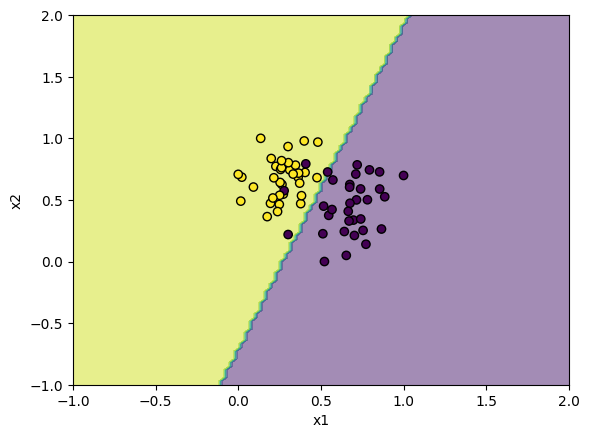

TEST KERNEL - rbf
 Resultats:
   Precisió Scikit: 0.8421052631578947
   Precisió UIB   : 0.8421052631578947


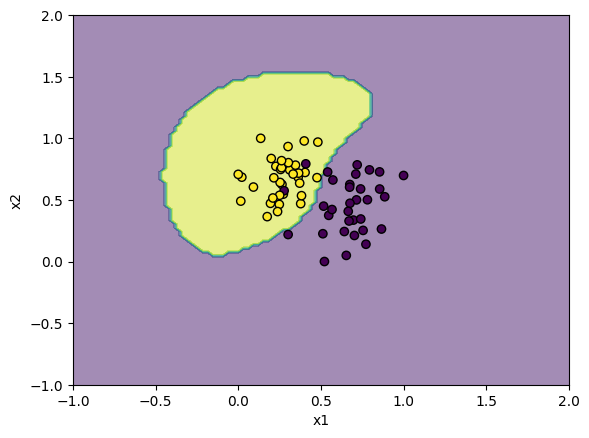

TEST KERNEL - poly
 Resultats:
   Precisió Scikit: 0.8888888888888888
   Precisió UIB   : 0.8888888888888888


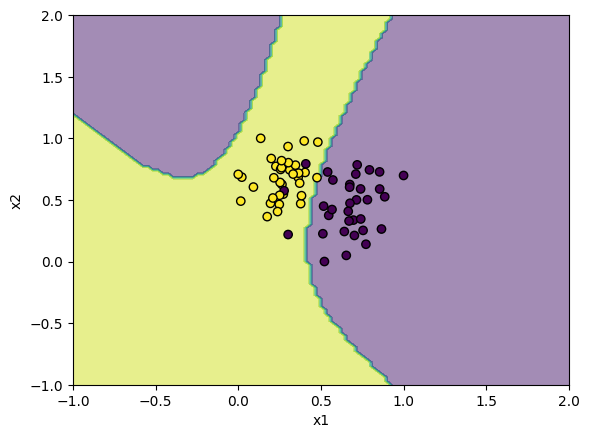

In [11]:
for kernel in kernels.keys():

    print(f"TEST KERNEL - {kernel}")
    svm_meu = SVC(C=C, kernel=kernels[kernel], random_state=random_state)
    svm_meu.fit(X_transformed, y_train)
    y_meu = svm_meu.predict(X_test_transformed)

    svm = SVC(C=C, kernel=kernel, random_state=random_state)
    svm.fit(X_transformed, y_train)
    y_nomeu = svm.predict(X_test_transformed)

    print(" Resultats:")
    precision_scikit = precision_score(y_test, y_nomeu)
    print(f"   Precisió Scikit: {precision_scikit}")
    precision_meu = precision_score(y_test, y_meu)
    print(f"   Precisió UIB   : {precision_meu}")

    disp1 = DecisionBoundaryDisplay.from_estimator(svm_meu, X_transformed,
                                                  response_method="predict", #  nom del mètode del qual obtindrem resultats
                                                  xlabel="x1",
                                                  ylabel="x2",
                                                  alpha=0.5)

    disp1.ax_.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train, edgecolor="k")

    plt.show()